# Week 4 Algorithmic Toolbox: Divide-and-Conquer



## **1. Binary Search**
In this problem, you will implement the binary search algorithm that allows searching very efficiently (even huge) lists, provided that the list is sorted.
### **Problem Description**
**Task.**  The goal in this code problem is to implement the binary search algorithm.

**Input Format.** The first line of the input contains an integer 𝑛 and a sequence 𝑎0 < 𝑎1 < . . . < 𝑎𝑛−1
of 𝑛 pairwise distinct positive integers in increasing order. The next line contains an integer 𝑘 and 𝑘
positive integers 𝑏0, 𝑏1, . . . , 𝑏𝑘−1.

**Constraints.** 1 ≤ 𝑘 ≤ $10^5$
; 1 ≤ 𝑛 ≤ 3 · $10^4$
; 1 ≤ 𝑎𝑖 ≤ $10^9$
for all 0 ≤ 𝑖 < 𝑛; 1 ≤ 𝑏𝑗 ≤ $10^9$
for all 0 ≤ 𝑗 < 𝑘;

**Output Format.** For all 𝑖 from 0 to 𝑘 − 1, output an index 0 ≤ 𝑗 ≤ 𝑛 − 1 such that 𝑎𝑗 = 𝑏𝑖 or −1 if there is no such index
### **Sample 1**
Input:

5 1 5 8 12 13

5 8 1 23 1 11

Output: 

2 0 -1 0 -1



### **Code**

In [1]:
%%writefile binarysearch.cpp
#include <iostream>
#include <cassert>
#include <vector>

using std::vector;

int binary_search(const vector<int> &a,int left, int right, int x) {
  if(right<left){
      return -1;
  }
  int mid= left+ ((right - left )/2);
  if (x==a[mid]){
      return mid;
  }
  else if (x<a[mid]){
      return binary_search(a,left,mid-1,x);
  }
  else{
      return binary_search(a,mid+1,right,x);
  }
}

int linear_search(const vector<int> &a, int x) {
  for (size_t i = 0; i < a.size(); ++i) {
    if (a[i] == x) return i;
  }
  return -1;
}

int main() {
  int left = 0;
  int right = 0;
  int n;
  std::cin >> n;
  vector<int> a(n);
  for (size_t i = 0; i < a.size(); i++) {
    std::cin >> a[i];
  }
  int m;
  std::cin >> m;
  vector<int> b(m);
  for (int i = 0; i < m; ++i) {
    std::cin >> b[i];
  }
  for (int i = 0; i < m; ++i) {
    left=0;
    right=(int)a.size()-1; 
    std::cout << binary_search(a,left,right, b[i]) << ' ';
  }
}

Writing binarysearch.cpp


### **Sample 1** 

In [2]:
!g++ binarysearch.cpp -o binarysearch
!./binarysearch

5 1 5 8 12 13
5 8 1 23 1 11
2 0 -1 0 -1 

## **2. Majority element**
Majority rule is a decision rule that selects the alternative which has a majority, that is, more than half the votes
### **Problem Description**
**Task.**  The goal in this code problem is to check whether an input sequence contains a majority element.

**Input Format.** The first line contains an integer 𝑛, the next one contains a sequence of 𝑛 non-negative integers 𝑎0, 𝑎1, . . . , 𝑎𝑛−1

**Constraints.**  1 ≤ 𝑛 ≤ $10^5$
; 0 ≤ 𝑎𝑖 ≤ $10^9$
for all 0 ≤ 𝑖 < 𝑛.


**Output Format.** Output 1 if the sequence contains an element that appears strictly more than 𝑛/2 times, and 0 otherwise
### **Sample 1**
Input:

5

2 3 9 2 2

Output: 

1

### **Sample 2**
Input:

4

1 2 3 4


Output: 

0
### **Sample 3**
Input:

4

1 2 3 1

Output: 

0


### **Code**

In [3]:
%%writefile getmajority.cpp
#include <algorithm>
#include <iostream>
#include <vector>

using std::vector;

int get_majority_element(vector<int> &a, int left, int right) {
  if (left == right) return -1;
  if (left+1== right) return a[left];


int mid= (left + right - 1 ) /2;

int x = get_majority_element(a, left, mid);
int y = get_majority_element(a, mid+1, right);

int x_count= 0 ;
int y_count=0;

for (int i=left;i<right;i++) {
    if (a[i]== x){
        x_count++;
    }
}

if (x_count>((right-left)/2)){
    return x;
}

for (int i=left;i<right;i++){
    if (a[i]== y){
        y_count++;
    }
}

if (y_count>((right-left)/2)){
    return y;
}

return -1;
 
}

int main() {
  int n;
  std::cin >> n;
  vector<int> a(n);
  for (size_t i = 0; i < a.size(); ++i) {
    std::cin >> a[i];
  }
  std::cout << (get_majority_element(a, 0, a.size())!=-1) << '\n';
}

Writing getmajority.cpp


### **Sample 1** 

In [4]:
!g++ getmajority.cpp -o getmajority
!./getmajority

5
2 3 9 2 2
1


### **Sample 2** 

In [5]:
!g++ getmajority.cpp -o getmajority
!./getmajority

4
1 2 3 4
0


### **Sample 3** 

In [6]:
!g++ getmajority.cpp -o getmajority
!./getmajority

4
1 2 3 1
0


## **3. Improving Quick Sort**
The goal in this problem is to redesign a given implementation of the randomized quick sort algorithm so that it works fast even on sequences containing many equal elements
### **Problem Description**
**Task.**  To force the given implementation of the quick sort algorithm to efficiently process sequences with few unique elements, your goal is replace a 2-way partition with a 3-way partition. That is, your new partition procedure should partition the array into three parts: < 𝑥 part, = 𝑥 part, and > 𝑥 part.

**Input Format.** The first line of the input contains an integer 𝑛. The next line contains a sequence of 𝑛 integers 𝑎0, 𝑎1, . . . , 𝑎𝑛−1

**Constraints.**  1 ≤ 𝑛 ≤ $10^5$
; 1 ≤ 𝑎𝑖 ≤ $10^9$
for all 0 ≤ 𝑖 < n


**Output Format.**  Output this sequence sorted in non-decreasing order.
### **Sample 1**
Input:

5

2 3 9 2 2

Output: 

2 2 2 3 9



### **Code**

In [7]:
%%writefile sort.cpp
#include <iostream>
#include <vector>
#include <cstdlib>

using std::vector;
using std::swap;

int partition2(vector<int> &a, int l, int r) {
  int x = a[l];
  int j = l;
  for (int i = l + 1; i <= r; i++) {
    if (a[i] <= x) {
      j++;
      swap(a[i], a[j]);
    }
  }
  swap(a[l], a[j]);
  return j;
}

void randomized_quick_sort(vector<int> &a, int l, int r) {
  if (l >= r) {
    return;
  }

  int k = l + rand() % (r - l + 1);
  swap(a[l], a[k]);
  int m = partition2(a, l, r);

  randomized_quick_sort(a, l, m - 1);
  randomized_quick_sort(a, m + 1, r);
}


vector<int> partition3(vector<int> &a, int l, int r) {
  int x = a[l];
  vector<int> res(2);
  for (int i = l ; i <= r; ) {
    if (a[i] < x) {
      swap(a[l], a[i]);
      l++;
      i++;
    }
    else if(a[i]==x){
      i++;
    }
    else{
        swap(a[i],a[r]);
        r--;
    }
    
  }

  res[0]=l;
  res[1]=r;
  return res;

}




void randomized_quick_sort_3part(vector<int> &a, int l, int r){
  if (l >= r) {
    return;
  }

  int k = l + rand() % (r - l + 1);
  swap(a[l], a[k]);
  vector<int> m(2);
   m[0]=l;
   m[1]=r;

  m = partition3(a, l, r);
 
  randomized_quick_sort_3part(a, l, m[0] - 1);
  randomized_quick_sort_3part(a, m[1] + 1, r);


}

int main() {
  int n;
  std::cin >> n;
  vector<int> a(n);
  for (size_t i = 0; i < a.size(); ++i) {
    std::cin >> a[i];
  }
  randomized_quick_sort_3part(a, 0, a.size() - 1);
  for (size_t i = 0; i < a.size(); ++i) {
    std::cout << a[i] << ' ';
  }
}

Writing sort.cpp


### **Sample 1** 

In [8]:
!g++ sort.cpp -o sort
!./sort

5
2 3 9 2 2
2 2 2 3 9 

# **Coursera Submition**

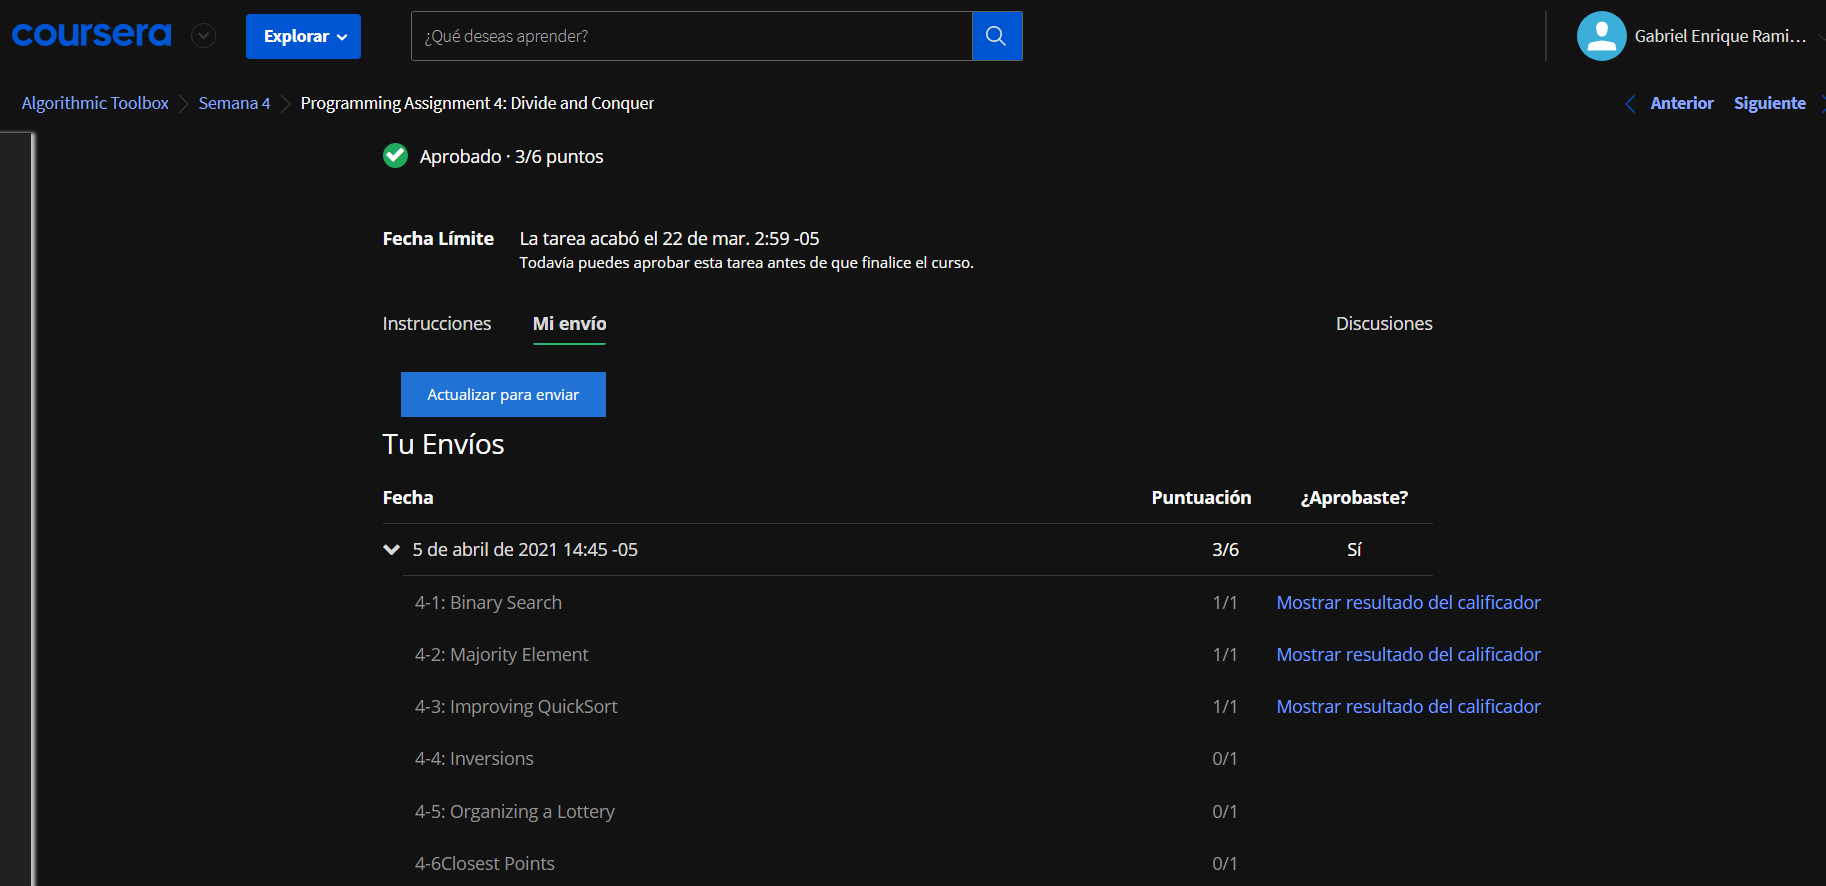